# Visualization Notebook

## Setup

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
# Python imports for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import epitools as epi

In [5]:
# to show the full output

pd.set_option('display.max_colwidth', None)

## Load Data

In [6]:
df = pd.read_csv('data/sorted.csv')
len(df)

587

In [7]:
df['aigcLabelType'].value_counts()

aigcLabelType
False    512
True      74
Name: count, dtype: int64

## Categories

In [8]:
conditions = [
    (df['gamer'] == 'gamer'),
    (df['biden_deepfakes'] == 'biden_deepfakes'),
    (df['presidential_debates'] == 'presidential_debates'),
    (df['psa_deepfakes'] == 'psa_deepfakes'),
    (df['vietnamese_trump'] == 'vietnamese_trump'),
    (df['trump_covers'] == 'trump_cover'),
    (df['biden_covers'] == 'biden_cover'),
    (df['trump_deepfakes'] == 'trump_deepfake')
]

choices = [
    'gamer',
    'biden_deepfakes',
    'presidential_debates',
    'psa_deepfakes',
    'vietnamese_trump',
    'trump_covers',
    'biden_covers',
    'trump_deepfakes'
]

df['category'] = np.select(conditions, choices, default='unknown')
df['category'].value_counts()
df.head()

,id,uniqueId,videoId,link,signature,followerCount,aigcLabelType,createTime,desc,playCount,shareCount,gamer,biden_deepfakes,presidential_debates,psa_deepfakes,vietnamese_trump,trump_covers,biden_covers,trump_deepfakes,category
0,7202754390540190766,presidentialdeepfakes,7205031224979508523,https://www.tiktok.com/@presidentialdeepfakes/video/7205031224979508523,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-28 2:41:05,The boys go on a late night drive to McDonalds #aivoice #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming #aipresidents,2213066,26836,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
1,6927014834434212869,covers.ai.songs,7251711953343696170,https://www.tiktok.com/@covers.ai.songs/video/7251711953343696170,"covers.ai fan acount, teen pop sensation and next best song producer 😤😤",7875.0,False,2023-07-03 21:46:11,"hello christ, im bout to sin again! #trump #aitrump #aicover #aicovers #biden #aibiden #flyanaboss #flyanabossyouwish",913053,41761,non-gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,trump_cover,non-biden_cover,non-trump_deepfake,trump_covers
2,7202754390540190766,presidentialdeepfakes,7202981692708080939,https://www.tiktok.com/@presidentialdeepfakes/video/7202981692708080939,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-22 14:07:56,Trump and Biden play War Thunder #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming,490077,1789,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
3,7202754390540190766,presidentialdeepfakes,7202957780104318254,https://www.tiktok.com/@presidentialdeepfakes/video/7202957780104318254,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-22 12:35:11,The boys play Among Us #president #ai #biden #aibiden #trump #aitrump #amongus #aipresident,305942,2515,gamer,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer
4,7032492950270837766,letstalktswizzle,7209428696069868802,https://www.tiktok.com/@letstalktswizzle/video/7209428696069868802,NaN,402.0,False,2023-03-11 23:05:50,Replying to @carchairheadrest #aivoice #aitrump #aibiden #taylorswift #tswizzle,199689,5649,non-gamer,non-biden_deepfakes,presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,presidential_debates


<Axes: ylabel='category'>

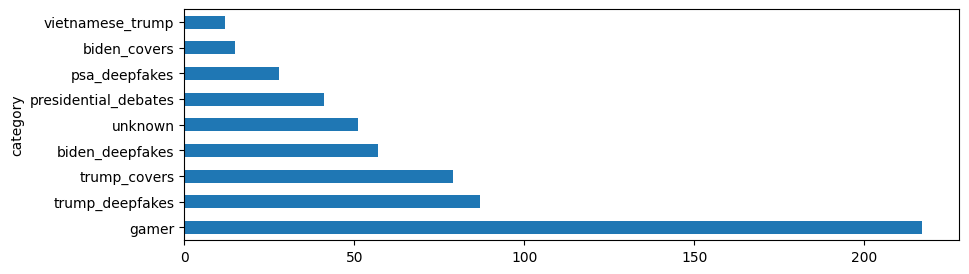

In [9]:
df['category'].value_counts().plot(kind='barh', figsize=(10,3))


In [10]:
df['category'].value_counts(normalize=True) * 100

category
gamer                   36.967632
trump_deepfakes         14.821124
trump_covers            13.458262
biden_deepfakes          9.710392
unknown                  8.688245
presidential_debates     6.984668
psa_deepfakes            4.770017
biden_covers             2.555366
vietnamese_trump         2.044293
Name: proportion, dtype: float64

In [11]:
df.head()

df['aigcLabelType'].value_counts(normalize=True) * 100


aigcLabelType
False    87.372014
True     12.627986
Name: proportion, dtype: float64

In [12]:
# create a new column ['deepfakes']
conditions = [
    (df['biden_deepfakes'] == 'biden_deepfakes'),
    (df['trump_deepfakes'] == 'trump_deepfake'),
    (df['presidential_debates'] == 'presidential_debates'),
    (df['psa_deepfakes'] == 'psa_deepfakes')
]

choices = [
    'biden_deepfakes',
    'trump_deepfakes',
    'presidential_debates',
    'psa_deepfakes'
]


df['deepfake'] = np.select(conditions, choices, default='False')
df['deepfake'] = np.where(df['deepfake'] == 'biden_deepfakes', True, df['deepfake'])
df['deepfake'] = np.where(df['deepfake'] == 'trump_deepfakes', True, df['deepfake'])
df['deepfake'] = np.where(df['deepfake'] ==  'presidential_debates', True, df['deepfake'])
df['deepfake'] = np.where(df['deepfake'] ==  'psa_deepfakes', True, df['deepfake'])
df['deepfake'].value_counts()


deepfake
False    356
True     231
Name: count, dtype: int64

In [13]:
df['vietnamese_trump'].value_counts()

vietnamese_trump
non-vietnamese_trump    575
vietnamese_trump         12
Name: count, dtype: int64

In [14]:
conditions = [
    (df['biden_covers'] == 'biden_cover'),
    (df['trump_covers'] == 'trump_cover'),
    (df['vietnamese_trump'] == 'vietnamese_trump')
]

choices = [
    'biden_covers',
    'trump_covers',
    'vietnamese_trump'
]

df['songs'] = np.select(conditions, choices, default='False')
df['songs'] = np.where(df['songs'] == 'vietnamese_trump', True, df['songs'])
df['songs'] = np.where(df['songs'] == 'trump_covers', True, df['songs'])
df['songs'] = np.where(df['songs'] == 'biden_covers', True, df['songs'])

df['songs'].value_counts()


songs
False    468
True     119
Name: count, dtype: int64

In [15]:
# change df['gamer'] to True if it is 'gamer' and false if non-gamer

df['gamer'] = np.where(df['gamer'] == 'gamer', True,  df['gamer'])
df['gamer'] = np.where(df['gamer'] == 'non-gamer', False,  df['gamer'])
df['gamer'].value_counts()



gamer
False    370
True     217
Name: count, dtype: int64

In [16]:
# save df as csv

# df.to_csv('clean/data-viz.csv', index=False)

df

,id,uniqueId,videoId,link,signature,followerCount,aigcLabelType,createTime,desc,playCount,...,biden_deepfakes,presidential_debates,psa_deepfakes,vietnamese_trump,trump_covers,biden_covers,trump_deepfakes,category,deepfake,songs
0,7202754390540190766,presidentialdeepfakes,7205031224979508523,https://www.tiktok.com/@presidentialdeepfakes/video/7205031224979508523,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-28 2:41:05,The boys go on a late night drive to McDonalds #aivoice #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming #aipresidents,2213066,...,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer,False,False
1,6927014834434212869,covers.ai.songs,7251711953343696170,https://www.tiktok.com/@covers.ai.songs/video/7251711953343696170,"covers.ai fan acount, teen pop sensation and next best song producer 😤😤",7875.0,False,2023-07-03 21:46:11,"hello christ, im bout to sin again! #trump #aitrump #aicover #aicovers #biden #aibiden #flyanaboss #flyanabossyouwish",913053,...,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,trump_cover,non-biden_cover,non-trump_deepfake,trump_covers,False,True
2,7202754390540190766,presidentialdeepfakes,7202981692708080939,https://www.tiktok.com/@presidentialdeepfakes/video/7202981692708080939,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-22 14:07:56,Trump and Biden play War Thunder #president #ai #biden #aibiden #trump #aitrump #aipresidentgaming,490077,...,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer,False,False
3,7202754390540190766,presidentialdeepfakes,7202957780104318254,https://www.tiktok.com/@presidentialdeepfakes/video/7202957780104318254,"Ai presidents videos, slideshows and full episodes of shows",134400.0,False,2023-02-22 12:35:11,The boys play Among Us #president #ai #biden #aibiden #trump #aitrump #amongus #aipresident,305942,...,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,gamer,False,False
4,7032492950270837766,letstalktswizzle,7209428696069868802,https://www.tiktok.com/@letstalktswizzle/video/7209428696069868802,NaN,402.0,False,2023-03-11 23:05:50,Replying to @carchairheadrest #aivoice #aitrump #aibiden #taylorswift #tswizzle,199689,...,non-biden_deepfakes,presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,non-trump_deepfake,presidential_debates,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,7237046194995495963,tranqhkz76b,7239718617762270491,https://www.tiktok.com/@tranqhkz76b/video/7239718617762270491,Help me 10000 follow🙏🙏🙏. thank you my friends🥰🥰 🥰❤️❤️❤️,300.0,False,2023-06-01 14:05:52,Biết tìm đâu Donald Trump #aitrump #trending #shorts #coverviral #fyp,24,...,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,vietnamese_trump,non-trump_cover,non-biden_cover,NaN,vietnamese_trump,False,True
583,7237046194995495963,tranqhkz76b,7240106093811092763,https://www.tiktok.com/@tranqhkz76b/video/7240106093811092763,Help me 10000 follow🙏🙏🙏. thank you my friends🥰🥰 🥰❤️❤️❤️,300.0,False,2023-06-02 15:09:31,Chúng ta không thuộc về nhau Donald #fyp #viral #trending #aitrump,9,...,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,vietnamese_trump,non-trump_cover,non-biden_cover,NaN,vietnamese_trump,False,True
584,7006207641354109957,deconimus_,7209383450132942086,https://www.tiktok.com/@deconimus_/video/7209383450132942086,I'm too old for this shit.,21.0,False,2023-03-11 20:10:04,AI Donald shares a college story. #trump #ai #aivoices #aipresidents #aitrump#4chan,122,...,non-biden_deepfakes,non-presidential_debates,non-psa_deepfakes,non-vietnamese_trump,non-trump_cover,non-biden_cover,N

month
2022-12      1
2023-02     77
2023-03    118
2023-04     47
2023-05     33
2023-06     47
2023-07     53
2023-08     40
2023-09     24
2023-10     13
2023-11     14
2023-12     16
2024-01     12
2024-02     62
2024-03     12
2024-04      2
2024-05     13
2024-06      3
Freq: M, Name: count, dtype: int64

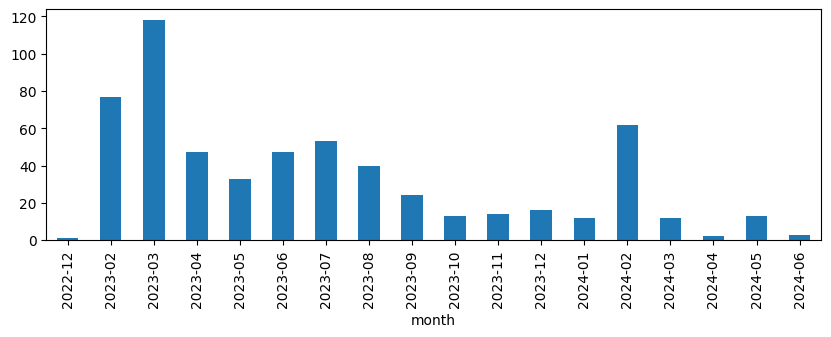

In [18]:
# plot the number of videos created per month grouped by category: gamer, deepfakes, songs

df['month'] = pd.to_datetime(df['createTime']).dt.to_period('M')

df['month'].value_counts().sort_index().plot(kind='bar', figsize=(10,3))

df['month'].value_counts().sort_index()

# plt.savefig('data.png')




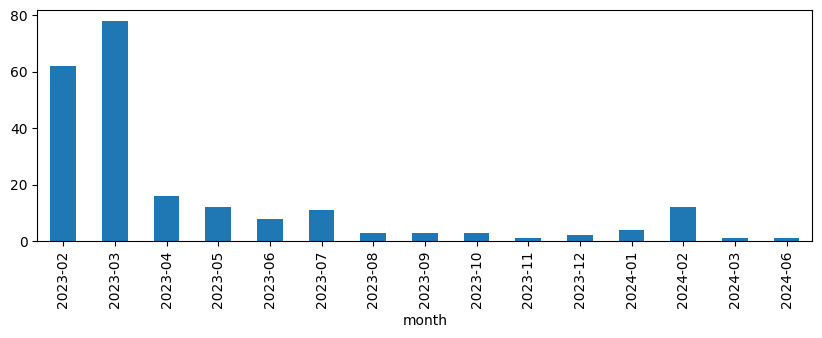

In [19]:
# plot the number of videos created per month grouped by category: gamer

df[df['gamer'] == True]['month'].value_counts().sort_index().plot(kind='bar', figsize=(10,3))

df[df['gamer'] == True]['month'].value_counts().sort_index()

# save as svg

# plt.savefig('gamer.svg')

month
2023-02    11
2023-03    29
2023-04    31
2023-05     8
2023-06     7
2023-07    21
2023-08    19
2023-09     8
2023-10     4
2023-11    10
2023-12     7
2024-01     7
2024-02    51
2024-03    11
2024-04     1
2024-05     3
2024-06     3
Freq: M, Name: count, dtype: int64

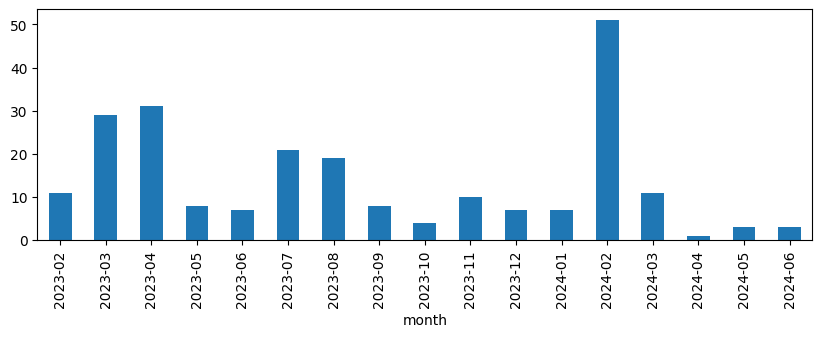

In [21]:
# plot the number of videos created per month grouped by category: deepfakes

df[df['deepfake'] == True]['month'].value_counts().sort_index().plot(kind='bar', figsize=(10,3))

df[df['deepfake'] == True]['month'].value_counts().sort_index()

# plt.savefig('deepfakes.svg')

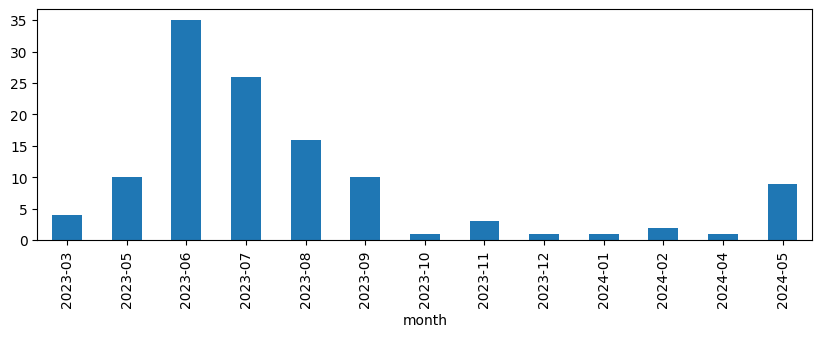

In [22]:
# plot the number of videos created per month grouped by category: songs

df[df['songs'] == True]['month'].value_counts().sort_index().plot(kind='bar', figsize=(10,3))

df[df['songs'] == True]['month'].value_counts().sort_index()

# plt.savefig('songs.svg')